# <center> ANALYSING APPROPRIATE CUSTOMER FOR TELEMARKETING IN BANKING

# Table of Contents

1. **[Project Objective](#1)**
2. **[Data Cleaning](#2)**
3. **[Data Visualization](#3)**
4. **[Machine Learning: Classification](#4)**
5. **[Machine Learning: Regression](#5)**
6. **[Conclusion](#6)**

# 1. Project objective

The main objective of this project is to increase the effectiveness of the bank's telemarketing campaign. This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans by comparing the costomer responce to their existing campaigns using different classifiaction and regression models.

# 2. Data cleaning <a id="2"></a>

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.

## 2.1 Load the data

In [1]:
#import th required library
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

In [2]:
#read the file
dataset1 = pd.read_csv('bank-full.csv',sep=';')

In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
dataset1.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## 2.2 Cleaning the Data 

In [6]:
#deleting the row having value other from column poutcome 
condition = dataset1.poutcome == 'other'
dataset2 = dataset1.drop(dataset1[condition].index, axis = 0, inplace = False)

In [7]:
#replacing the column value unknown of job and education to others 
dataset2[['job','education']] = dataset2[['job','education']].replace(['unknown'],'other')

In [8]:
from scipy.stats import zscore
print(dataset2[['balance']].mean())
dataset2['balance_outliers'] = dataset2['balance']

balance    1356.963063
dtype: float64


In [9]:
#for calculating the zscore
mean = np.mean(dataset2) 
std = np.std(dataset2) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is age                   40.986443
balance             1356.963063
day                   15.862904
duration             258.266930
campaign               2.776671
pdays                 32.158954
previous               0.434853
balance_outliers    1356.963063
dtype: float64
std. deviation is age                   10.595332
balance             3030.921406
day                    8.324026
duration             257.947525
campaign               3.138017
pdays                 90.688150
previous               1.559387
balance_outliers    3030.921406
dtype: float64


In [10]:
#using the zscore to remove the values which are out of the specified range
dataset2['balance_outliers']= zscore(dataset2['balance_outliers'])
condition1 = (dataset2['balance_outliers']>3) | (dataset2['balance_outliers']<-3 )
dataset3 = dataset2.drop(dataset2[condition1].index, axis = 0, inplace = False)

In [11]:
#dropping the balance outliners column
dataset4 = dataset3.drop('balance_outliers', axis=1)

In [12]:
#Change column name from 'y' to 'response'
dataset4.rename(index=str, columns={'y': 'response'}, inplace = True)

#to count the number of yes and no in column response
def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset4[new_column].value_counts()

convert(dataset4, "response_binary", "response")

0    37785
1     4870
Name: response_binary, dtype: int64

In [13]:
# Drop column contact
dataset5 = dataset4.drop('contact', axis=1)

In [14]:
#Change the unit of 'duration' from seconds to minutes
dataset5['duration'] = dataset5['duration'].apply(lambda n:n/60).round(2)

In [15]:
# Change 'month' from words to numbers 
lst = [dataset5]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [16]:
#Drop rows that 'duration' < 5s
condition2 = (dataset5['duration']<5/60)
dataset6 = dataset5.drop(dataset5[condition2].index, axis = 0, inplace = False)

In [17]:
#Drop customer values with 'other' education
condition3 = (dataset6['education'] == 'other')
dataset7 = dataset6.drop(dataset6[condition3].index, axis = 0, inplace = False)

# 3. Visualizing the data <a id="3"></a>

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

## 3.1 Visualize the distribution of 'age' and 'balance'

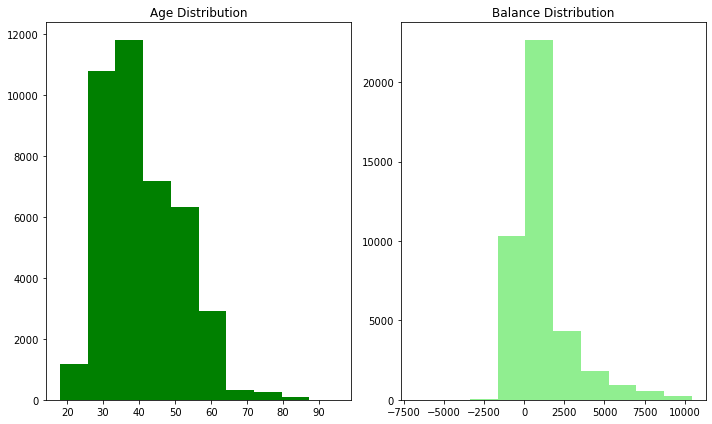

In [18]:
#to visualize the age and balance of clients using histogram
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset7['age'],color='green')
ra1.set_title('Age Distribution')

ra2.hist(dataset7['balance'], color = 'lightgreen')
ra2.set_title('Balance Distribution')

plt.tight_layout() 
plt.show()

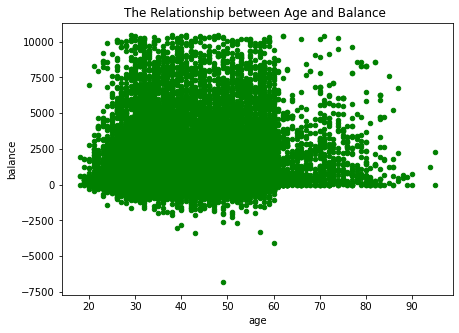

In [19]:
#to visualize the age and balance of clients using scatter-plot
scatter_age_balance = dataset7.plot.scatter('age','balance',figsize = (7,5), color='green')

plt.title('The Relationship between Age and Balance ')
plt.show()

## 3.2 Visualize the subscription and contact rate by age

In [20]:
lst = [dataset7]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [21]:
count_age_response_pct = pd.crosstab(dataset7['response'],dataset7['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [22]:
age = pd.DataFrame(dataset7['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

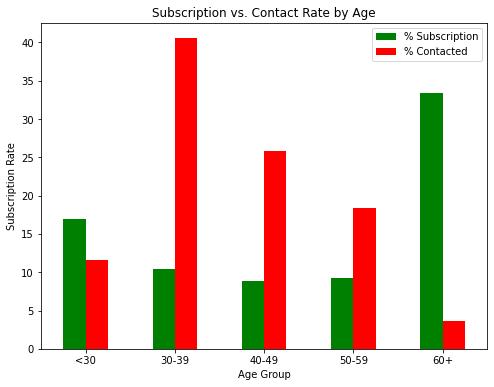

In [23]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

# 4. Machine Learning : Classification Model <a id="4"></a>

The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits.

## 4.1 Prepare Data for Classification

In [24]:
dataset7.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int,age_group
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5.0,50.0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5.0,40.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5.0,30.0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,5.0,30.0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,5.0,20.0


In [25]:
dataset7.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int,age_group
45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,11.0,20.0
45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,11.0,50.0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,11.0,60.0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,11.0,60.0
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0,11.0,50.0


In [26]:
df = pd.DataFrame(dataset7)
df.to_csv("bank-cleaned.csv")

In [27]:
dataset = read_csv("bank_cleaned.csv")
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [28]:
# View the first 5 rows of cleaned data
dataset.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [29]:
dataset.drop(['marital'],axis=1, inplace=True)
dataset1 = dataset.iloc[:, 0:7]

In [30]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(dataset['response_binary'])
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)

In [31]:
array = dataset2.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [33]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

## 4.2 Comparison between Logistic Regression and Gaussian Naive Bayes

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [35]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

In [36]:
import warnings
warnings.filterwarnings('ignore')
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.885314 (0.005896)
NB: 0.823855 (0.005429)


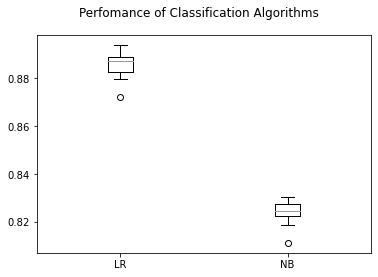

In [37]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [38]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.8909291222915902


### Conclusion-

**Logistic regression is the best performing model.**

Among all algorithms, logistic regression achieved an accuracy of about 88%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features. 

# 5. Machine Learning : Regression Model <a id="5"></a>

Regression analysis is carried out to complement the classification result and help the bank better predict campaign outcome based on customer statistics.

## 5.1 Prepare Data for Regression

In [39]:
dataset4 = dataset2.drop(['response_binary'],axis = 1)
dataset4['duration'] = dataset['duration']

In [40]:
array = dataset4.values
X = array[:,0:20]
Y = array[:,20]

In [41]:
test_size= 0.20
seed = 10
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

## 5.2 Comparison between Linear Regression, Ridge and Lasso Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [43]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))

In [44]:
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -18.667426 (1.243464)
LASSO: -18.701201 (1.256921)
RIDGE: -18.667404 (1.243472)


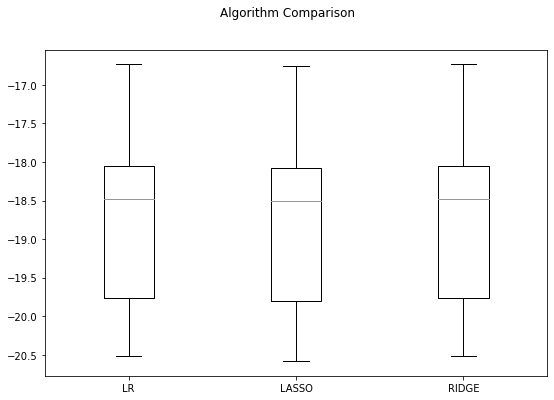

In [45]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

In [46]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
predicted_y = ridge.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
print('The MSE is', mean_squared_error(Y_test, predicted_y))

The MSE is 17.7797404329447


### Conclusion-

**Ridge regression is the best performing model.**

According to the previous analysis, observations on duration are extremely varied from 0.1 to 81.97 minutes in this dataset. Therefore, a 17.78 MSE testifies that ridge regression is a sound model in predicting the target variable and suggest that the bank can roughly estimate the duration of campaign calls of each client using their customer profiles such as age, job, and loans.

# 6. Conclusion <a id="6"></a>

**The main objective of this project is to increase the effectiveness of the bank's telemarketing campaign, which was successfully met through data analysis,  visualization and analytical model building. A target customer profile was  established while classification and regression models were built to predict customers' response to the term deposit campaign.**

By applying logistic and ridge regression algorithms, classification and estimation model were successfully built. With these two models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.

In addition, predicting duration before calling and adjusting marketing plan benefit both the bank and its clients. On the one hand, it will increase the efficiency of the bank’s telemarketing campaign, saving time and efforts. On the other hand, it prevents some clients from receiving undesirable advertisements, raising customer satisfaction. With the aid of logistic and ridge regression models, the bank can enter a virtuous cycle of effective marketing, more investments and happier customers.